In [4]:
import argparse
import os

import numpy as np

from DistantSpeech.noise_estimation.NoiseEstimationBase import NoiseEstimationBase
from DistantSpeech.noise_estimation import NoiseEstimationMCRA, MCRA2
from DistantSpeech.beamformer.utils import load_audio as audioread

In [5]:
def main():
    from DistantSpeech.transform.transform import Transform
    from DistantSpeech.beamformer.utils import pmesh, load_wav, mesh
    from matplotlib import pyplot as plt
    import librosa

    filepath = "test_audio/rec1/"
    x, sr = load_wav(os.path.abspath(filepath))      # [channel,samples]
    x = audioread('mix.wav')
    x = x.T
    sr = 16000
    r = 0.032
    c = 343

    frameLen = 512
    hop = int(frameLen / 2)
    overlap = frameLen - hop
    nfft = frameLen
    c = 340
    r = 0.032
    fs = sr

    print(x.shape)

    transform = Transform(n_fft=nfft, hop_length=hop)

    D = transform.stft(x[0, :])
    Y, _ = transform.magphase(D, 2)
    print(Y.shape)
    pmesh(librosa.power_to_db(Y))
    # plt.savefig('pmesh.png')

    mcra = NoiseEstimationMCRA(nfft=nfft)
    # mcra = MCRA2(nfft=nfft)
    noise_psd = np.zeros(Y.shape)
    p = np.zeros(Y.shape)
    for n in range(Y.shape[1]):
        mcra.estimation(Y[:, n])
        noise_psd[:, n] = mcra.lambda_d
        p[:, n] = mcra.p

    pmesh(librosa.power_to_db(noise_psd))
    # plt.savefig('noise_psd.png')

    pmesh(p)
    mesh(1-p)
    # self.q = np.sqrt(1 - self.mcra.p / 2)
    # plt.savefig('p.png')


(6, 316761)
(257, 1237)


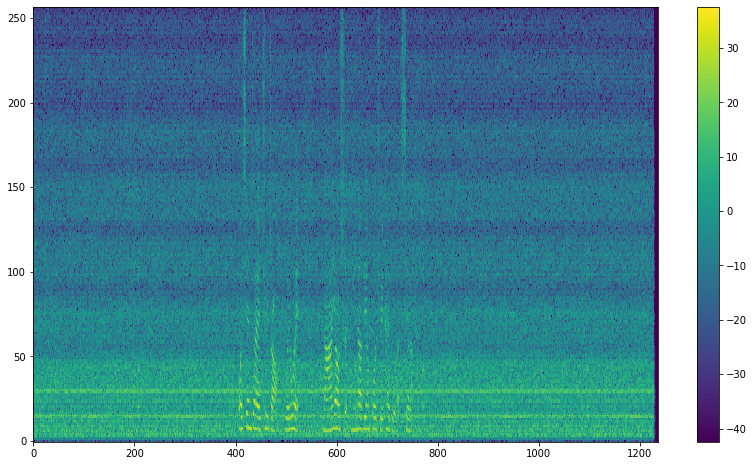

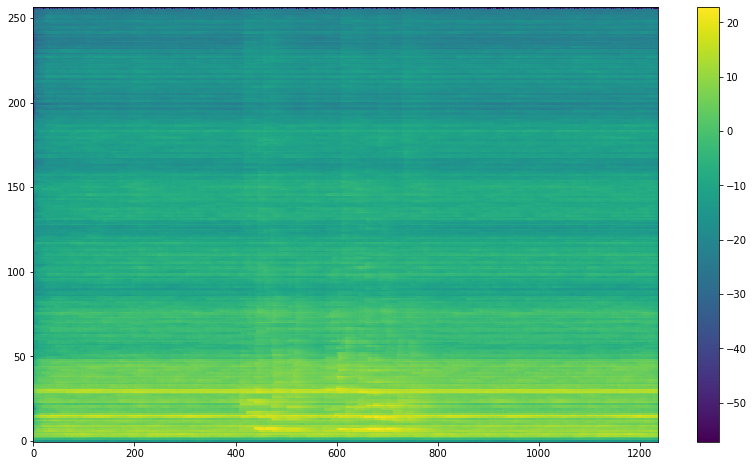

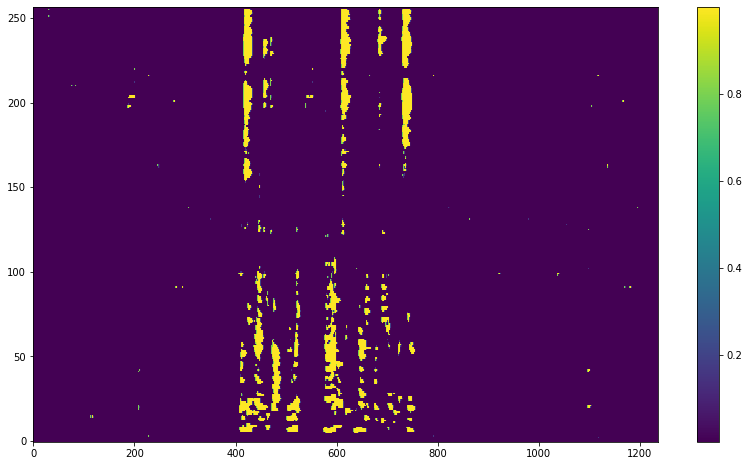

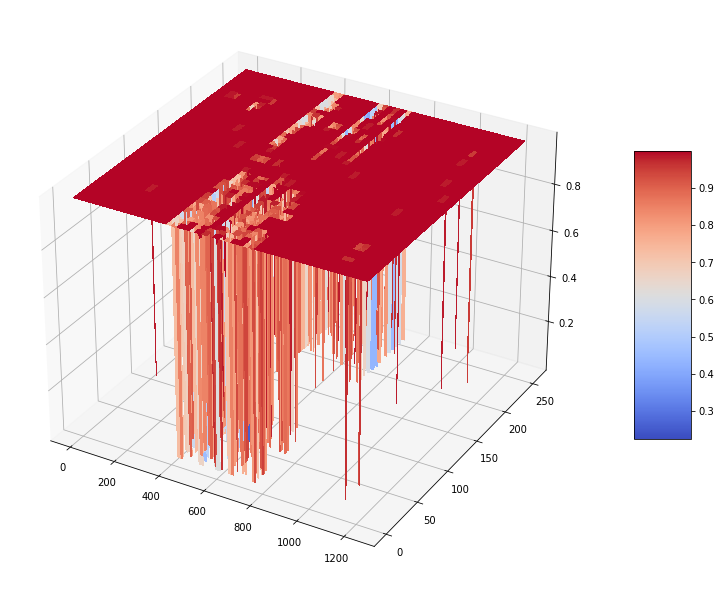

In [6]:
main()